In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

df = pd.read_csv("mobile_prices_2023.csv    ")
df.head(3)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [5]:
# 2. Data Cleaning & Preprocessing
df.columns = df.columns.str.strip()
if "Price in INR" in df.columns:
    df.rename(columns={"Price in INR": "price"}, inplace=True)

if "price" in df.columns:
    df["price"] = df["price"].astype(str).str.replace("₹", "", regex=True).str.replace(",", "", regex=True)
    df["price"] = pd.to_numeric(df["price"], errors="coerce")
    df["price"].fillna(df["price"].median(), inplace=True)
    
df['price'].head(3)

C:\Users\MSI\AppData\Local\Temp\ipykernel_12604\3101534564.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["price"].fillna(df["price"].median(), inplace=True)


0     5649
1    11999
2     6999
Name: price, dtype: int64

In [6]:
# dropping date of scrapping
df.drop(columns=['Date of Scraping'], inplace=True, errors='ignore')
df.fillna(df.median(numeric_only=True), inplace=True)
df.sample(4)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,price
650,"SAMSUNG Galaxy A33 (Awesome Peach, 128 GB)",4.1,"1,922",6 GB RAM,128 GB ROM,48MP + 8MP + 5MP + 2MP,13MP Front Camera,5000 mAh,Exynos 1280 Processor,27999
280,"realme 3i (Diamond Red, 64 GB)",4.4,"80,202",4 GB RAM,64 GB ROM,13MP + 2MP,13MP Front Camera,4230 mAh,MediaTek Helio P60 Octa Core 2.0 GHz Processor,10499
1614,"OnePlus 7 Pro (Almond, 256 GB)",4.5,"1,364",8 GB RAM,256 GB ROM,48 MP + 8 MP + 16 MP,16MP Front Camera,4000 mAh,1 year manufacturer warranty for device and 6 ...,44744
522,"SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)",4.2,"15,053",6 GB RAM,128 GB ROM,50MP + 2MP,13MP Front Camera,6000 mAh,"Exynos 1330, Octa Core Processor",14490


In [7]:
# Fill categorical missing values with mode
for col in df.select_dtypes(exclude=["number"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.head(3)

C:\Users\MSI\AppData\Local\Temp\ipykernel_12604\1725713984.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,price
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999


In [8]:
df.duplicated().sum()

np.int64(69)

In [9]:
df.drop_duplicates(inplace=True)

Descriptive Statistics:
         Rating ?/5          price
count  1767.000000    1767.000000
mean      4.212281   23654.801924
std       0.534338   24351.398264
min       0.000000    1199.000000
25%       4.200000    9999.000000
50%       4.300000   15999.000000
75%       4.400000   27990.000000
max       4.800000  169999.000000


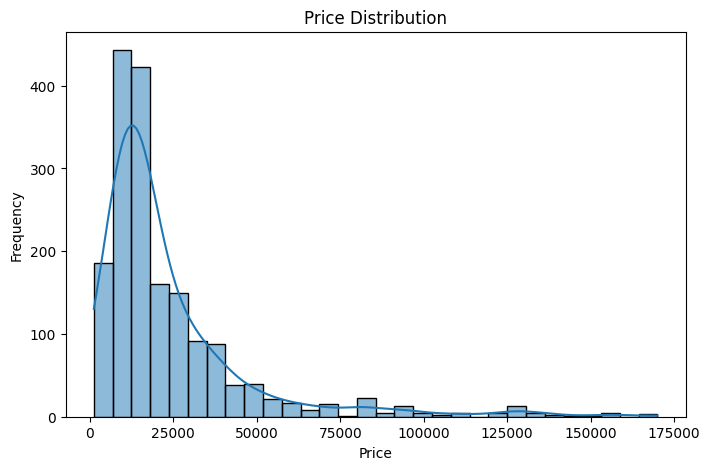

Skewness of Price: 2.837534546796572
Kurtosis of Price: 9.717868260905483


In [10]:
# 3. Exploratory Data Analysis (EDA)
print("Descriptive Statistics:\n", df.describe())

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

print("Skewness of Price:", df['price'].skew())
print("Kurtosis of Price:", df['price'].kurt())

In [11]:
# Function to extract numbers and handle NaN safely
def extract_numbers(column):
    return df[column].str.extract(r'(\d+)')[0].fillna(0).astype(int)

# Convert numerical columns safely
df['RAM'] = extract_numbers('RAM')
df['ROM/Storage'] = extract_numbers('ROM/Storage')
df['Back/Rare Camera'] = extract_numbers('Back/Rare Camera')
df['Front Camera'] = extract_numbers('Front Camera')
df['Battery'] = extract_numbers('Battery')

# Extract first word from 'Phone Name' (Brand)
df['Phone Name'] = df['Phone Name'].str.split().str[0]

# Extract first word from 'Processor' (Chipset Manufacturer)
df['Processor'] = df['Processor'].str.split().str[0]

# Remove commas and convert 'Number of Ratings' safely
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '').fillna(0).astype(int)

df.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,price
0,POCO,4.2,33561,2,32,8,5,5000,Mediatek,5649
1,POCO,4.2,77128,4,64,50,8,5000,Mediatek,11999
2,POCO,4.3,15175,4,64,8,5,5000,Helio,6999
3,POCO,4.2,22621,4,64,50,5,5000,Mediatek,7749
4,POCO,4.3,15175,4,64,8,5,5000,Helio,6999
5,POCO,4.2,77128,4,64,50,8,5000,Mediatek,11999
6,POCO,4.2,22621,4,64,50,5,5000,Mediatek,7749
7,POCO,4.2,22621,4,64,50,5,5000,Mediatek,7749
8,POCO,4.1,13647,6,128,50,5,5000,Mediatek,9249
9,POCO,4.2,40525,6,128,50,8,5000,Mediatek,13999


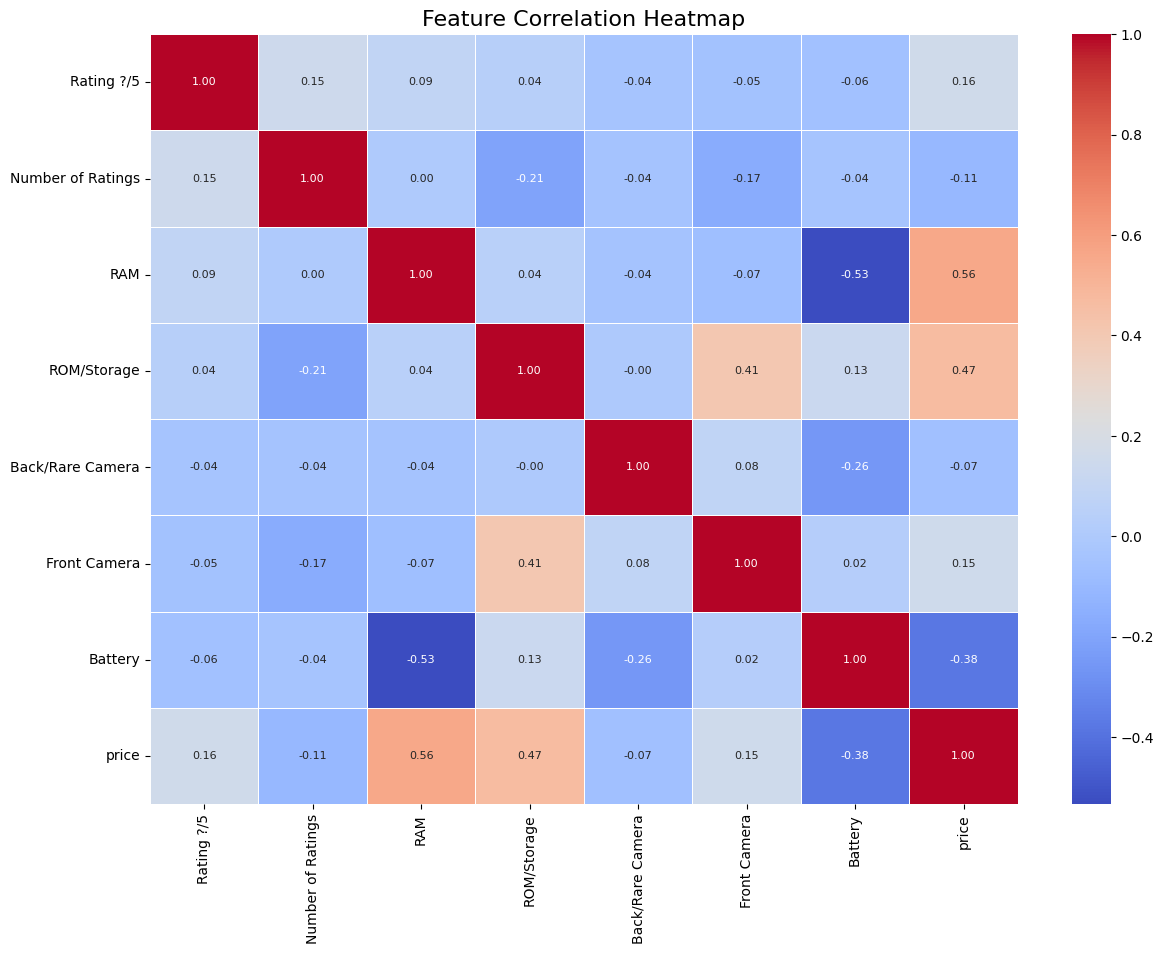

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, OneHotEncoder

# Correlation Heatmap
plt.figure(figsize=(14, 10))
heatmap_data=df[['Rating ?/5','Number of Ratings','RAM','ROM/Storage','Back/Rare Camera','Front Camera','Battery','price']]
sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"fontsize":8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [13]:
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
price                0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df['Number of Ratings']=sc.fit_transform(df[['Number of Ratings']])
df['Battery']=sc.fit_transform(df[['Battery']])

# 4. Feature Engineering & Preprocessing
X = df.iloc[:,0:9]
y = df["price"]

print(X,y)


     Phone Name  Rating ?/5  Number of Ratings  RAM  ROM/Storage  \
0          POCO         4.2          -0.135738    2           32   
1          POCO         4.2           0.309129    4           64   
2          POCO         4.3          -0.323479    4           64   
3          POCO         4.2          -0.247447    4           64   
4          POCO         4.3          -0.323479    4           64   
...         ...         ...                ...  ...          ...   
1831    Infinix         4.3          -0.217212    4           64   
1832    Infinix         4.3          -0.217212    4           64   
1833    Infinix         4.3          -0.217212    4           64   
1834    Infinix         4.2          -0.405760    8          128   
1835    Infinix         4.3          -0.318108    4           64   

      Back/Rare Camera  Front Camera   Battery Processor  
0                    8             5  0.552076  Mediatek  
1                   50             8  0.552076  Mediatek  
2     

In [15]:
from sklearn.model_selection import train_test_split

# 8. Model Training & Hyperparameter Tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train,X_test)

     Phone Name  Rating ?/5  Number of Ratings  RAM  ROM/Storage  \
946        vivo         4.3          -0.477319   12          256   
893        vivo         4.5          -0.247478    6          128   
611     SAMSUNG         4.1          -0.452588    0            0   
976        vivo         4.3          -0.464473    4          128   
72         POCO         4.2           0.393799    6          128   
...         ...         ...                ...  ...          ...   
1170      Redmi         4.3          -0.331658    2           32   
1346      Nokia         4.0          -0.469569    6          128   
892        vivo         4.5          -0.247478    6          128   
1519       Moto         4.2           3.256609    2           16   
1166      Redmi         4.4          -0.409252    3           32   

      Back/Rare Camera  Front Camera   Battery   Processor  
946                 50            32  0.440009   Dimensity  
893                 64            16  0.257162  Snapdragon  


In [16]:
df.shape

(1767, 10)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_columns = ['Phone Name','Processor']

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'  # Keep any other columns as they are
)

regressor = RandomForestRegressor(n_estimators=150,max_depth=15,max_samples=0.5,max_features=0.75, random_state=42)

# Combine 2 outputs
pipe_data=Pipeline([('preprocessor',preprocessor),
               ('regressor',regressor)])

pipe_data.fit(X_train,y_train)
y_pred = pipe_data.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R-squared: 0.9591
Mean Absolute Error: 2868.42
Root Mean Squared Error: 5768.90


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [18]:
# Save Model
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe_data,open('pipe_data.pkl','wb'))

print("Model has been saved successfully!")

Model has been saved successfully!
